<a href="https://colab.research.google.com/github/AmandaCruz07/Data/blob/main/Assignment2_notebook_Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group 7: Daniel Johnson, Amanda Cruz, Brian Reyes, Peter Ekunwe

Sources: Chatgpt with the following prompts


“How to handle categorical columns in a data set when performing classification”

“How do I evaluate the effectiveness of my classification?”

“How do I determine the balance of my target column?”

“How do I rebalance my column if it is unbalanced?”

“How do I use a preprocessing pipeline?”

“Add a visualisation to the ROC curve”


#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import (datasets,
                     metrics,
                     model_selection as skms,
                     linear_model,
                     naive_bayes,
                     neighbors)
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from scipy.stats import zscore


#Load/ View Data

In [ ]:
file_id = '1BcXkjYxrCgEg74FyfTWylp8WkRr-6D40'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31929 entries, 0 to 31928
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31929 non-null  int64  
 1   person_income               31929 non-null  int64  
 2   person_home_ownership       31929 non-null  object 
 3   person_emp_length           31057 non-null  float64
 4   loan_intent                 31929 non-null  object 
 5   loan_grade                  31929 non-null  object 
 6   loan_amnt                   31929 non-null  int64  
 7   loan_int_rate               28884 non-null  float64
 8   loan_status                 31929 non-null  int64  
 9   loan_percent_income         31929 non-null  float64
 10  cb_person_default_on_file   31929 non-null  object 
 11  cb_person_cred_hist_length  31929 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.9+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31929.000000,3.192900e+04,31057.000000,31929.000000,28884.000000,31929.000000,31929.000000,31929.000000
mean,27.734881,6.611913e+04,4.781724,9588.035955,11.009620,0.218046,0.170161,5.804817
std,6.351938,6.227983e+04,4.137051,6321.418083,3.238403,0.412925,0.106919,4.054980
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.950000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#Print Head

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,28000,OWN,6.0,HOMEIMPROVEMENT,B,10000,10.37,0,0.36,N,2
1,27,64000,RENT,0.0,PERSONAL,C,10000,15.27,0,0.16,Y,10
2,26,72000,MORTGAGE,10.0,EDUCATION,D,16000,NaN,0,0.22,N,3
3,23,27996,RENT,7.0,DEBTCONSOLIDATION,A,10000,NaN,1,0.36,N,2
4,30,44500,RENT,2.0,MEDICAL,E,13000,16.32,1,0.29,N,6


#Are there categorical or numerical features?

In [ ]:
# Check for categorical and numerical features
def check_feature_types(df):
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print(f'Categorical Features: {categorical_features}')
    print(f'Numerical Features: {numerical_features}\n')

check_feature_types(df)

Categorical Features: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
Numerical Features: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']



Analysis: Yes, there are both numerical and categorical features.


#Are there missing values?

In [ ]:
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              872
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3045
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Analysis: There are two columns with missing values. These columns are person_emp_length and loan_int_rate. We will replace these with the mean

#Replace Null Values

In [ ]:
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)  # Replace NaNs with the mean of the column
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)  # Replace NaNs with the mean of the column

#Check that missing values have been replaced

In [ ]:
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


#Check for outliers

In [ ]:
def check_outliers(df, z_thresh=3):
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    outliers = pd.DataFrame()
    for col in numerical_features:
        outliers[col] = np.abs(zscore(df[col]))
    outliers = (outliers > z_thresh).sum()
    print(f'Outliers (Z-Score > {z_thresh}):\n{outliers}\n')

check_outliers(df)

Outliers (Z-Score > 3):
person_age                    547
person_income                 227
person_emp_length             309
loan_amnt                     331
loan_int_rate                  53
loan_status                     0
loan_percent_income           335
cb_person_cred_hist_length    279
dtype: int64



#Is there colinearity?

In [ ]:
# Check for collinearity (focus on numerical features)
def check_collinearity(df, threshold=0.8):
    numerical_df = df.select_dtypes(include=['int64', 'float64'])
    corr_matrix = numerical_df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    collinear_pairs = [(column, upper_tri[column].idxmax(), upper_tri[column].max()) for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    print(f'Collinear Pairs (Threshold > {threshold}):\n{collinear_pairs}\n')

check_collinearity(df)

Collinear Pairs (Threshold > 0.8):
[('cb_person_cred_hist_length', 'person_age', 0.8590789737613815)]



Analysis: Yes, person credit history length and person age are highly correlated. This correlation makes sense as older people will have longer credit histories.

#Which numerical varibles are best at predicting our target variable?

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate mutual information between each numerical feature and the target
mutual_info = mutual_info_classif(df[numerical_features], df['loan_status'])

# Create a DataFrame to display the mutual information
mi_df = pd.DataFrame({'Feature': numerical_features, 'Mutual Information': mutual_info})
mi_df.sort_values(by='Mutual Information', ascending=False, inplace=True)

print(f'Mutual Information with Target Variable:\n{mi_df}\n')


Mutual Information with Target Variable:
                      Feature  Mutual Information
5                 loan_status            0.525552
1               person_income            0.113792
6         loan_percent_income            0.082570
4               loan_int_rate            0.068471
3                   loan_amnt            0.013978
2           person_emp_length            0.007900
0                  person_age            0.003237
7  cb_person_cred_hist_length            0.000951



Analysis: Apart from the target itself, person income and loan percent income provide the most predictive value. Since age and credit history are highly correlated and credit history has low predictive value, we can drop this column.

In [ ]:
# Drop the collinear and less informative feature
df.drop(columns=['cb_person_cred_hist_length'], inplace=True)

#Can we determine which class is a higher credit risk?

In [ ]:
# Calculate detailed descriptive statistics for person_income and loan_percent_income for each loan_status class
descriptive_stats = df.groupby('loan_status')[['person_income', 'loan_percent_income']].describe()

print("Descriptive statistics of person_income and loan_percent_income for each loan_status class:")
print(descriptive_stats)

Descriptive statistics of person_income and loan_percent_income for each loan_status class:
            person_income                                               \
                    count          mean           std     min      25%   
loan_status                                                              
0                 24967.0  70895.571154  66982.326134  7000.0  42000.0   
1                  6962.0  48989.955760  36386.149452  4000.0  30000.0   

                                         loan_percent_income            \
                 50%      75%        max               count      mean   
loan_status                                                              
0            60000.0  84500.0  6000000.0             24967.0  0.148621   
1            41000.0  59004.0   703800.0              6962.0  0.247407   

                                                     
                  std   min   25%   50%   75%   max  
loan_status                                          
0   

Analysis: Since income and loan percent variables were determined to have the most predictive value, we looked at how these features differ between the two classes. Based on the results we can determine 3 things.

1. Class 0 has significally higher count.
2. Class 0 has a much higher mean income.
3. Class 0 has a lower mean interest rate.

All 3 of these point to class 0 being a lower credit risk.

#Is the target balanced?


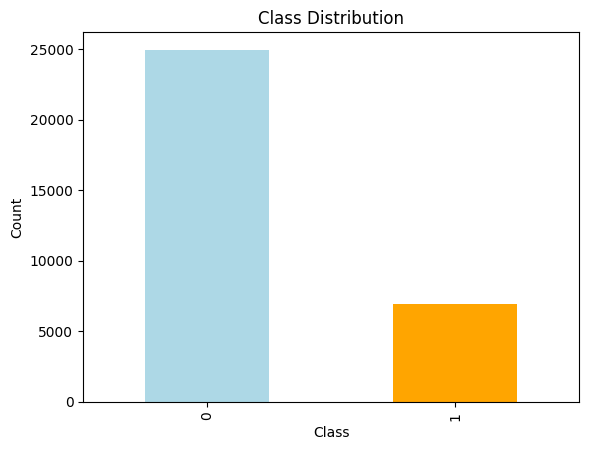

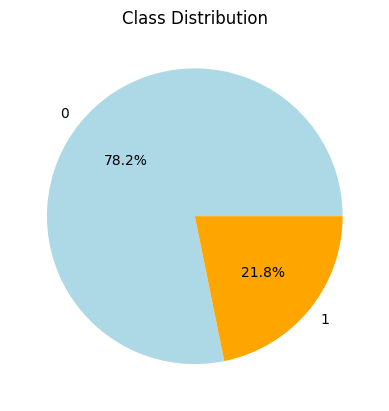

In [ ]:

class_counts = df['loan_status'].value_counts()
class_counts.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_counts = df['loan_status'].value_counts()
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Class Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()


Analysis: There are significantly more class 0 values than class 1, meaning the class distribution is unbalanced. This inbalance will have to be addressed and assessed.

#Perform classification and view results

In [ ]:

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Separate features and target
X = df.drop('loan_status', axis=1)  # Adjust 'loan_status' as needed
y = df['loan_status']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a binary classification model (e.g., Logistic Regression)
model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
report = metrics.classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Accuracy: 0.81
Confusion Matrix:
[[4742  220]
 [ 982  442]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4962
           1       0.67      0.31      0.42      1424

    accuracy                           0.81      6386
   macro avg       0.75      0.63      0.66      6386
weighted avg       0.79      0.81      0.78      6386



Analysis: Our first run model determines that Class 0 is more accurate than Class 1, potentially due to the unblanced distribution previously identified.


#Visualize results

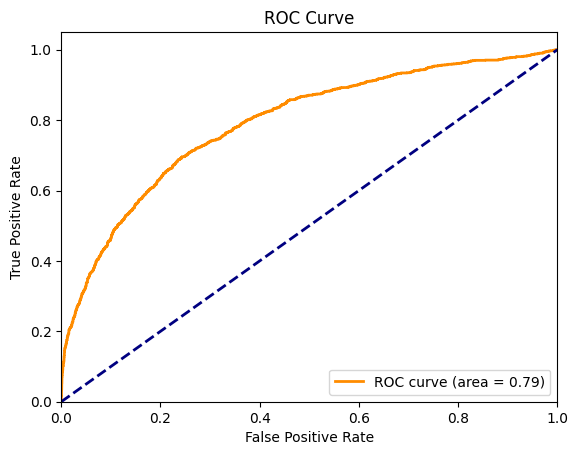

In [ ]:
# visualize the results

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Analysis: We have determined an ROC curve with an area = 0.79, making the graph to curve closer to the top left, which is the preferred curvature. It apprears that the model performed farily well but there is certainly room for improvement.

#Visualize results further

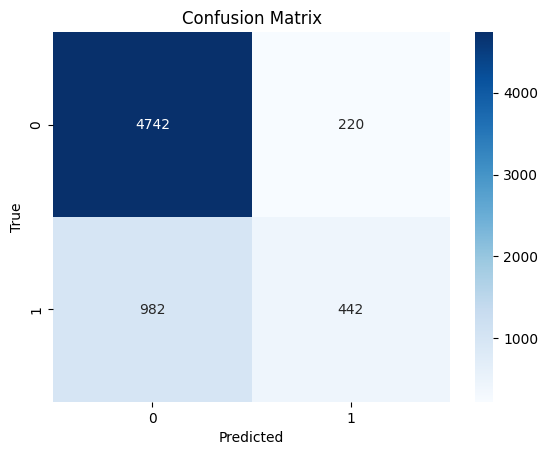

In [ ]:
# visualize the confusion matrix to better understand how your model performs
# in terms of true positives, true negatives, false positives, and false negatives.

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Apply preprocessing pipeline

In [ ]:

# Define the feature columns
numeric_features = [
    "person_age", "person_income", "person_emp_length",
    "loan_amnt", "loan_int_rate", "loan_percent_income",
]
categorical_features = [
    "person_home_ownership", "loan_intent",
    "loan_grade", "cb_person_default_on_file"
]

# Create the numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Create the categorical transformer
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine them into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Split the data
y = df["loan_status"]
X = df.drop(columns=["loan_status"])

# Build the pipeline
pipeline_steps = [
    ('pre', preprocessor),
    ('DT', DecisionTreeClassifier())
]
pipe = Pipeline(pipeline_steps)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the pipeline on the test data
score = pipe.score(X_test, y_test)

score

# Compute and print additional metrics
y_pred = pipe.predict(X_test)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[5755  468]
 [ 409 1351]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6223
           1       0.74      0.77      0.75      1760

    accuracy                           0.89      7983
   macro avg       0.84      0.85      0.84      7983
weighted avg       0.89      0.89      0.89      7983



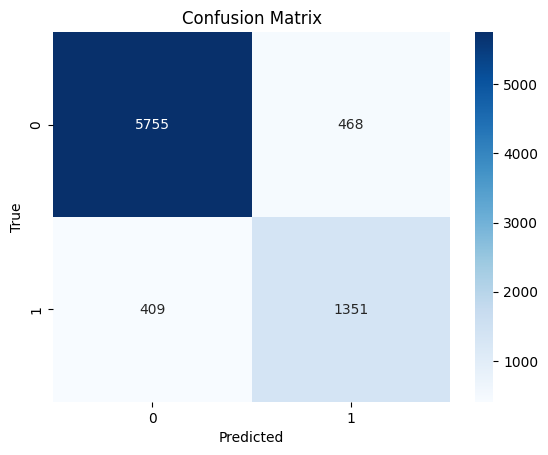

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Analysis: When comparing the first confusion matrix to the second matrix after preprocessing, we were able to identify that all metrics have improved. This
 improvement is especially prevalant in predicting the Class 1 variable as we can see a new f1 score for this variable of 0.75 vs 0.43 in our previous run.

#Try rebalancing

Accuracy Score: 0.9313541275209821
Confusion Matrix:
[[6183   40]
 [ 508 1252]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6223
           1       0.97      0.71      0.82      1760

    accuracy                           0.93      7983
   macro avg       0.95      0.85      0.89      7983
weighted avg       0.93      0.93      0.93      7983

ROC AUC Score: 0.9274646472762333


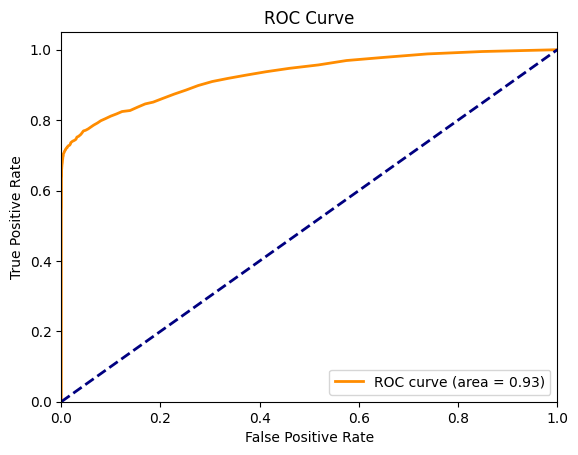

In [ ]:

# Define the feature columns
numeric_features = [
    "person_age", "person_income", "person_emp_length",
    "loan_amnt", "loan_int_rate", "loan_percent_income",
]
categorical_features = [
    "person_home_ownership", "loan_intent",
    "loan_grade", "cb_person_default_on_file"
]

# Create the numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Create the categorical transformer
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine them into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Split the data
y = df["loan_status"]
X = df.drop(columns=["loan_status"])

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y)
class_weights_dict = dict(zip([0, 1], class_weights))

# Build the pipeline with RandomForestClassifier and class weights
pipeline_steps = [
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(class_weight=class_weights_dict, random_state=42))
]
pipe = Pipeline(pipeline_steps)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the pipeline on the test data
score = pipe.score(X_test, y_test)

print("Accuracy Score:", score)

# Compute and print additional metrics
y_pred = pipe.predict(X_test)

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Compute and print the ROC AUC Score
y_prob = pipe.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



Analysis: By using the 'class_weight_balance' calculation, our model is able to attach a weight to our Class 0 and Class 1 variables in order to avoid imbalancing. This step has allowed our model to improve its f1 score to 96 for Class 0 and 82 for Class 1, which is an improvement of .04 and .07 respectively.

We can also visualize the results with a new ROC curve showing a new ROC score of .93 vs our original of .79.

#Test code

In [ ]:
import requests
from io import StringIO

# Load your original dataset
file_id = '1BcXkjYxrCgEg74FyfTWylp8WkRr-6D40'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

# Define the feature columns
numeric_features = [
    "person_age", "person_income", "person_emp_length",
    "loan_amnt", "loan_int_rate", "loan_percent_income",
    "cb_person_cred_hist_length"
]
categorical_features = [
    "person_home_ownership", "loan_intent",
    "loan_grade", "cb_person_default_on_file"
]

# Create the numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Create the categorical transformer
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine them into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Split the data
y = df["loan_status"]
X = df.drop(columns=["loan_status"])

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y)
class_weights_dict = dict(zip([0, 1], class_weights))

# Build the pipeline with RandomForestClassifier and class weights
pipeline_steps = [
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(class_weight=class_weights_dict, random_state=42))
]
pipe = Pipeline(pipeline_steps)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the pipeline on the test data
score = pipe.score(X_test, y_test)
print(f'Accuracy on the test data: {score}')

# Load the new data from the provided online URL
url = 'https://raw.githubusercontent.com/Dong2Yo/PredcitiveAnalysis_BusinessProfessional/main/data/new_data_w_target.csv'
response = requests.get(url)
data = pd.read_csv(StringIO(response.text))

# Ensure the new data has the same preprocessing
new_X = data.drop(columns=["loan_status"])
new_y_true = data["loan_status"]

# Predict using the pipeline
new_y_pred = pipe.predict(new_X)

# Compare predictions with the actual target values
accuracy_new_data = accuracy_score(new_y_true, new_y_pred)
print(f'Accuracy on the new data: {accuracy_new_data}')


Accuracy on the test data: 0.9308530627583615
Accuracy on the new data: 0.9248466257668712


Analysis: Model was able to predict the correct class 92.4% of the time with the new data.